## Î™®Îìà import

In [1]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import dlib

## Ïù¥ÎØ∏ÏßÄ ÏùΩÍ∏∞

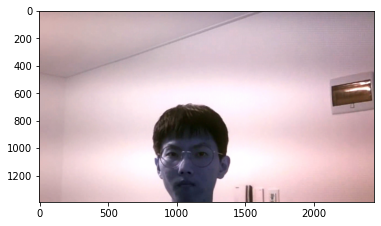

In [2]:
my_image_path = os.getenv('HOME')+'/aiffel/cs/images/face.PNG'
img_bgr = cv2.imread(my_image_path)   
img_show = img_bgr.copy()      
plt.imshow(img_bgr)
plt.show()

# opencvÎäî ÏòàÏô∏Ï†ÅÏúºÎ°ú BGR(ÌååÎûë, ÎÖπÏÉâ, Îπ®Í∞ï)Î•º ÏÇ¨Ïö©ÌïòÍ∏∞ÎïåÎ¨∏Ïóê ÏÉâÏù¥ Ïù¥ÏÉÅÌï®

## BRG to RGB

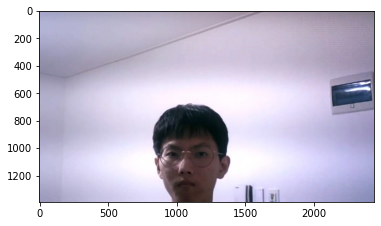

In [3]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

## sliding window ÎßåÎì§Í∏∞

In [4]:
# detector ÏÑ†Ïñ∏
detector_hog = dlib.get_frontal_face_detector()
print("Ïä•")

Ïä•


In [5]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)   # detector_hog(Ïù¥ÎØ∏ÏßÄ, Ïù¥ÎØ∏ÏßÄ ÌîºÎùºÎØ∏Îìú Ïàò) 
                                        # Ïù¥ÎØ∏ÏßÄ ÌîºÎùºÎØ∏Îìú = upsamplingÏùÑ ÌÜµÌï¥ Ïù¥ÎØ∏ÏßÄÎ•º ÌÇ§Ïö∞Îäî Í≤É
print("ÏÇ≠")

ÏÇ≠


## ÏñºÍµ¥Í≤ÄÏ∂ú

rectangles[[(861, 913) (1324, 1376)]]


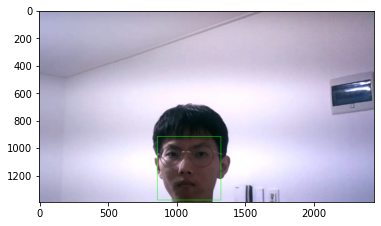

In [6]:
print(dlib_rects)   

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

##  land mark Î™®Îç∏ Î∂àÎü¨Ïò§Í∏∞

In [7]:
model_path = os.getenv('HOME')+'/aiffel/cs/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)
print("üå´")

üå´


## point ÏßÄÏ†ï

In [8]:
list_landmarks = []

for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

    
# land markÏùò Ï¢åÌëúÎ•º 68Í∞úÏùò Î¶¨Ïä§Ìä∏Î°ú Ï†ÄÏû•    
print(len(list_landmarks[0]))

68


## land mark Ï∂úÎ†•

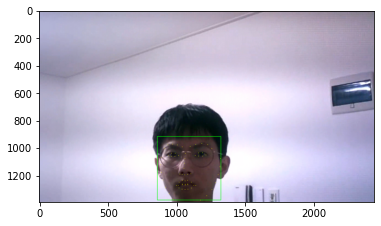

In [9]:
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

## ÏΩîÏùò Ï§ëÏã¨Ï†ê ÌôïÏù∏

In [10]:
# 
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[30]) # ÏΩîÏùò indexÎäî 30 ÏûÖÎãàÎã§
    x = landmark[30][0]
    y = landmark[30][1] - dlib_rect.height()//2
    w = h = dlib_rect.width()
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))

(1055, 1145)
(x,y) : (1055,913)
(w,h) : (464,464)


## Ïä§Ìã∞Ïª§ resize

In [11]:
sticker_path = os.getenv('HOME')+'/aiffel/cs/images/cat.png'
img_sticker = cv2.imread(sticker_path) # Ïä§Ìã∞Ïª§ Ïù¥ÎØ∏ÏßÄÎ•º Î∂àÎü¨ÏòµÎãàÎã§
img_sticker = cv2.resize(img_sticker, (w,h))
print (img_sticker.shape)

(464, 464, 3)


## Ï¢åÌëúÏßÄÏ†ï

In [12]:
refined_x = x - w // 2
refined_y = y
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (823,913)


## Î≤óÏñ¥ÎÇú Ïù¥ÎØ∏ÏßÄ crop

In [13]:
# Î≤óÏñ¥ÎÇòÏßÄ ÏïäÏïòÍ∏∞ÎïåÎ¨∏Ïóê ÏÇ¨Ïö©ÌïòÏßÄÏïäÏùå

# if refined_x < 0: 
#     img_sticker = img_sticker[:, -refined_x:]
#     refined_x = 0
# if refined_y < 0:
#     img_sticker = img_sticker[-refined_y:, :]
#     refined_y = 0

# print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

## Ïù¥ÎØ∏ÏßÄÏóê Ïä§Ìã∞Ïª§Ï†ÅÏö©

In [14]:
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8) 
print("~")

~


## Ï∂úÎ†•

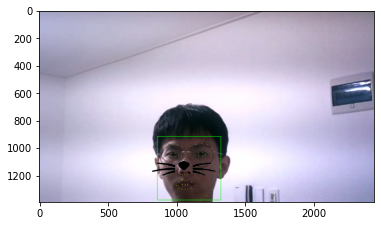

In [15]:
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

## ÎûúÎìúÎßàÌÅ¨Ï†úÍ±∞

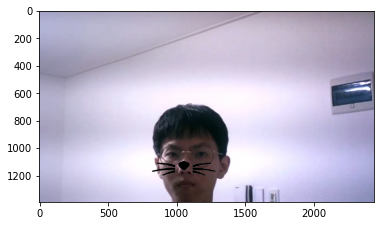

In [16]:
sticker_area = img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

## ÌöåÏÉâÏ°∞ ÏòÅÏÉÅ

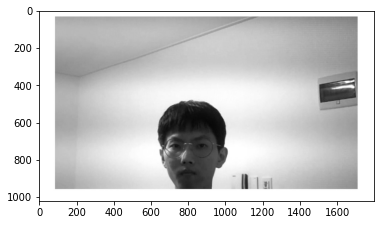

In [17]:
# rgb2grayÎ°ú ÌöåÏÉâÏ°∞ÏòÅÏÉÅÎ≥ÄÌôò

my_image_path = os.getenv('HOME')+'/aiffel/cs/images/face2.jpg'
img_bgr = cv2.imread(my_image_path)   
img_show = img_bgr.copy()      
plt.imshow(img_bgr)
plt.show()

# opencvÎäî ÏòàÏô∏Ï†ÅÏúºÎ°ú BGR(ÌååÎûë, ÎÖπÏÉâ, Îπ®Í∞ï)Î•º ÏÇ¨Ïö©ÌïòÍ∏∞ÎïåÎ¨∏Ïóê ÏÉâÏù¥ Ïù¥ÏÉÅÌï®

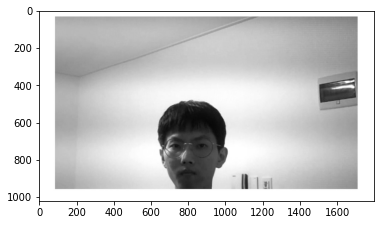

In [18]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

In [19]:
# detector ÏÑ†Ïñ∏
detector_hog = dlib.get_frontal_face_detector()
print("Ïä•")

Ïä•


In [20]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)   # detector_hog(Ïù¥ÎØ∏ÏßÄ, Ïù¥ÎØ∏ÏßÄ ÌîºÎùºÎØ∏Îìú Ïàò) 
                                        # Ïù¥ÎØ∏ÏßÄ ÌîºÎùºÎØ∏Îìú = upsamplingÏùÑ ÌÜµÌï¥ Ïù¥ÎØ∏ÏßÄÎ•º ÌÇ§Ïö∞Îäî Í≤É
print("ÏÇ≠")

ÏÇ≠


rectangles[[(633, 634) (954, 955)]]


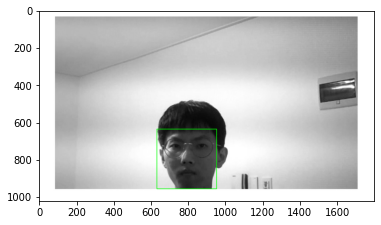

In [21]:
print(dlib_rects)   

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [22]:
model_path = os.getenv('HOME')+'/aiffel/cs/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)
print("„Öá")

„Öá


In [23]:
list_landmarks = []

for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

    
# land markÏùò Ï¢åÌëúÎ•º 68Í∞úÏùò Î¶¨Ïä§Ìä∏Î°ú Ï†ÄÏû•    
print(len(list_landmarks[0]))

68


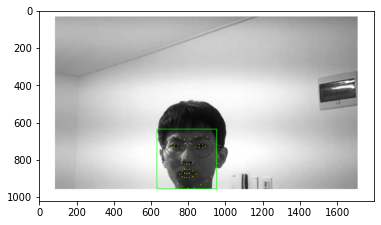

In [24]:
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [25]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[30]) # ÏΩîÏùò indexÎäî 30 ÏûÖÎãàÎã§
    x = landmark[30][0]
    y = landmark[30][1] - dlib_rect.height()//2
    w = h = dlib_rect.width()
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))

(788, 792)
(x,y) : (788,631)
(w,h) : (322,322)


In [26]:
sticker_path = os.getenv('HOME')+'/aiffel/cs/images/cat.png'
img_sticker = cv2.imread(sticker_path) # Ïä§Ìã∞Ïª§ Ïù¥ÎØ∏ÏßÄÎ•º Î∂àÎü¨ÏòµÎãàÎã§
img_sticker = cv2.resize(img_sticker, (w,h))
print (img_sticker.shape)

(322, 322, 3)


In [27]:
refined_x = x - w // 2
refined_y = y
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (627,631)


In [28]:
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8) 
print("~")

~


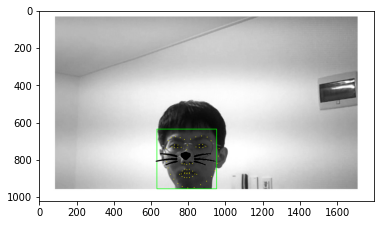

In [29]:
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

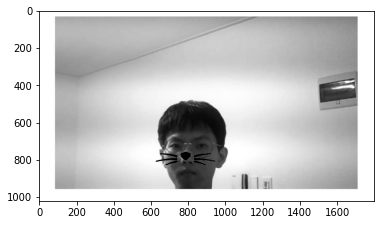

In [30]:
sticker_area = img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

## Í∞ÅÎèÑÏóêÎî∞Î•∏ Ï∞®Ïù¥

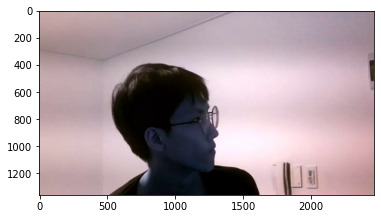

In [31]:
my_image_path = os.getenv('HOME')+'/aiffel/cs/images/face3.PNG'
img_bgr = cv2.imread(my_image_path)   
img_show = img_bgr.copy()      
plt.imshow(img_bgr)
plt.show()

# opencvÎäî ÏòàÏô∏Ï†ÅÏúºÎ°ú BGR(ÌååÎûë, ÎÖπÏÉâ, Îπ®Í∞ï)Î•º ÏÇ¨Ïö©ÌïòÍ∏∞ÎïåÎ¨∏Ïóê ÏÉâÏù¥ Ïù¥ÏÉÅÌï®

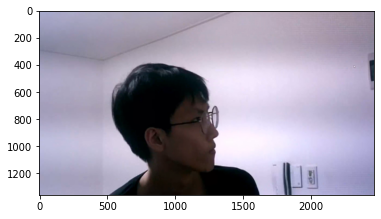

In [32]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

In [33]:
# detector ÏÑ†Ïñ∏
detector_hog = dlib.get_frontal_face_detector()
print("Ïä•")

Ïä•


In [34]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)   # detector_hog(Ïù¥ÎØ∏ÏßÄ, Ïù¥ÎØ∏ÏßÄ ÌîºÎùºÎØ∏Îìú Ïàò) 
                                        # Ïù¥ÎØ∏ÏßÄ ÌîºÎùºÎØ∏Îìú = upsamplingÏùÑ ÌÜµÌï¥ Ïù¥ÎØ∏ÏßÄÎ•º ÌÇ§Ïö∞Îäî Í≤É
print("ÏÇ≠")

ÏÇ≠


rectangles[]


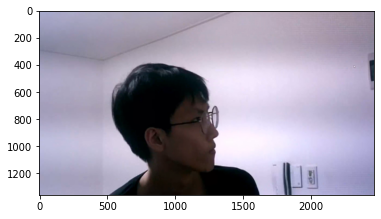

In [35]:
print(dlib_rects)   

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [36]:
model_path = os.getenv('HOME')+'/aiffel/cs/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)
print("„Öá")

„Öá


In [38]:
list_landmarks = []

for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

    
# # land markÏùò Ï¢åÌëúÎ•º 68Í∞úÏùò Î¶¨Ïä§Ìä∏Î°ú Ï†ÄÏû•    
# print(len(list_landmarks[0]))

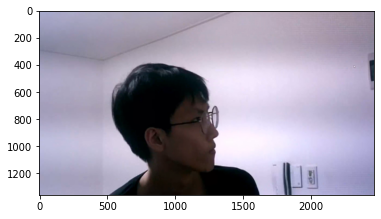

In [39]:
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

# ÎûúÎìúÎßàÌÅ¨Î•º Î™ªÏû°ÎäîÎ™®ÏäµÏùÑ Î≥ºÏàòÏûàÎã§.

In [40]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[30]) # ÏΩîÏùò indexÎäî 30 ÏûÖÎãàÎã§
    x = landmark[30][0]
    y = landmark[30][1] - dlib_rect.height()//2
    w = h = dlib_rect.width()
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))

In [41]:
sticker_path = os.getenv('HOME')+'/aiffel/cs/images/cat.png'
img_sticker = cv2.imread(sticker_path) # Ïä§Ìã∞Ïª§ Ïù¥ÎØ∏ÏßÄÎ•º Î∂àÎü¨ÏòµÎãàÎã§
img_sticker = cv2.resize(img_sticker, (w,h))
print (img_sticker.shape)

(322, 322, 3)


In [42]:
refined_x = x - w // 2
refined_y = y
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (627,631)


In [43]:
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8) 
print("~")

~


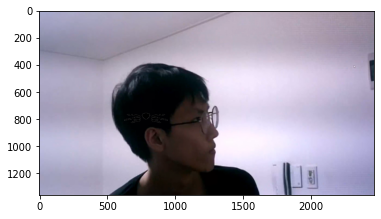

In [44]:
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

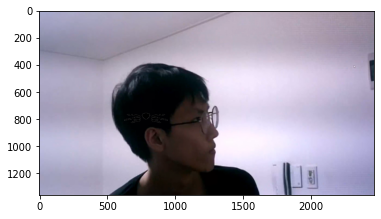

In [45]:
sticker_area = img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()